In [82]:
## 해야할 것
## 대표 뉴스포럼을 선정하여 그 뉴스사에서 낸 것들을 데이터 분석화 할 예정
## 

## 오류해결

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import os


In [84]:
## 폰트 설치 필수 한글 다 깨져요~~!!!!
import matplotlib.pyplot as plt
plt.rcParams['font.family']='gulim'

In [85]:
df_makguli = pd.read_csv('data/네이버막걸리뉴스.csv')
df_makguli = df_makguli.drop_duplicates(subset=None,keep='first',inplace=False)
df_makguli.columns=['num','yyyymmdd','names','title','text']
df_makguli['yyyymm'] = df_makguli['yyyymmdd'].apply(lambda x: x[0:7])
df_makguli_groupby = df_makguli.groupby(['yyyymm']).agg('size')
df_makguli_groupby2 = df_makguli.groupby(['yyyymmdd']).agg('size')


In [86]:
df_rum = pd.read_csv('data/네이버럼뉴스.csv')
df_rum = df_rum.drop_duplicates(subset=None,keep='first',inplace=False)
df_rum.columns=['num','yyyymmdd','names','title','text']
df_rum['yyyymm'] = df_rum['yyyymmdd'].apply(lambda x: x[0:7])
df_rum_groupby = df_rum.groupby(['yyyymm']).agg('size')
df_rum_groupby2 = df_rum.groupby(['yyyymmdd']).agg('size')


In [87]:
df_gorangju = pd.read_csv('data/네이버고량주뉴스.csv')
df_gorangju = df_gorangju.drop_duplicates(subset=None,keep='first',inplace=False)
df_gorangju.columns=['num','yyyymmdd','names','title','text']
df_gorangju['yyyymm'] = df_gorangju['yyyymmdd'].apply(lambda x: x[0:7])
df_gorangju_groupby = df_gorangju.groupby(['yyyymm']).agg('size')
df_gorangju_groupby2 = df_gorangju.groupby(['yyyymmdd']).agg('size')

In [88]:
df_bear = pd.read_csv('data/네이버맥주뉴스.csv')
df_bear = df_bear.drop_duplicates(subset=None,keep='first',inplace=False)
df_bear.columns=['num','yyyymmdd','names','title','text']
df_bear['yyyymm'] = df_bear['yyyymmdd'].apply(lambda x: x[0:7])
df_bear_groupby = df_bear.groupby(['yyyymm']).agg('size')
df_bear_groupby2 = df_bear.groupby(['yyyymmdd']).agg('size')

In [89]:
df_boadca = pd.read_csv('data/네이버보드카뉴스.csv')
df_boadca = df_boadca.drop_duplicates(subset=None,keep='first',inplace=False)
df_boadca.columns=['num','yyyymmdd','names','title','text']
df_boadca['yyyymm'] = df_boadca['yyyymmdd'].apply(lambda x: x[0:7])
df_boadca_groupby = df_boadca.groupby(['yyyymm']).agg('size')
df_boadca_groupby2 = df_boadca.groupby(['yyyymmdd']).agg('size')

In [90]:
df_soju = pd.read_csv('data/네이버소주뉴스.csv')
df_soju = df_soju.drop_duplicates(subset=None,keep='first',inplace=False)
df_soju.columns=['num','yyyymmdd','names','title','text']
df_soju['yyyymm'] = df_soju['yyyymmdd'].apply(lambda x: x[0:7])
df_soju_groupby = df_soju.groupby(['yyyymm']).agg('size')
df_soju_groupby2 = df_soju.groupby(['yyyymmdd']).agg('size')

In [91]:
df_wine = pd.read_csv('data/네이버와인뉴스.csv')
df_wine = df_wine.drop_duplicates(subset=None,keep='first',inplace=False)
df_wine.columns=['num','yyyymmdd','names','title','text']
df_wine['yyyymm'] = df_wine['yyyymmdd'].apply(lambda x: x[0:7])
df_wine_groupby = df_wine.groupby(['yyyymm']).agg('size')
df_wine_groupby2 = df_wine.groupby(['yyyymmdd']).agg('size')

In [92]:
df_whiskey = pd.read_csv('data/네이버위스키뉴스.csv')
df_whiskey = df_whiskey.drop_duplicates(subset=None,keep='first',inplace=False)
df_whiskey.columns=['num','yyyymmdd','names','title','text']
df_whiskey['yyyymm'] = df_whiskey['yyyymmdd'].apply(lambda x: x[0:7])
df_whiskey_groupby = df_whiskey.groupby(['yyyymm']).agg('size')
df_whiskey_groupby2 = df_whiskey.groupby(['yyyymmdd']).agg('size')

In [93]:
df_juntongju = pd.read_csv('data/네이버전통주뉴스.csv')
df_juntongju = df_juntongju.drop_duplicates(subset=None,keep='first',inplace=False)
df_juntongju.columns=['num','yyyymmdd','names','title','text']
df_juntongju['yyyymm'] = df_juntongju['yyyymmdd'].apply(lambda x: x[0:7])
df_juntongju_groupby = df_juntongju.groupby(['yyyymm']).agg('size')
df_juntongju_groupby2 = df_juntongju.groupby(['yyyymmdd']).agg('size')

In [94]:
df_localsoju = pd.read_csv('data/네이버지역소주뉴스.csv')
df_localsoju = df_localsoju.drop_duplicates(subset=None,keep='first',inplace=False)
df_localsoju.columns=['num','yyyymmdd','names','title','text']
df_localsoju['yyyymm'] = df_localsoju['yyyymmdd'].apply(lambda x: x[0:7])
df_localsoju_groupby = df_localsoju.groupby(['yyyymm']).agg('size')
df_localsoju_groupby2 = df_localsoju.groupby(['yyyymmdd']).agg('size')

<AxesSubplot:xlabel='yyyymm'>

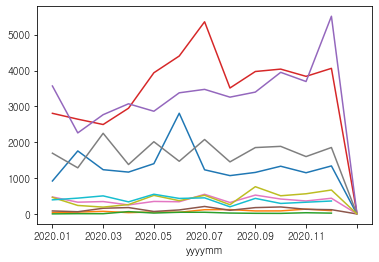

In [95]:
df_makguli_groupby.plot()
df_rum_groupby.plot()
df_gorangju_groupby.plot()
df_bear_groupby.plot()
df_wine_groupby.plot()
df_boadca_groupby.plot()
df_whiskey_groupby.plot()
df_soju_groupby.plot()
df_juntongju_groupby.plot()
df_localsoju_groupby.plot()

<AxesSubplot:xlabel='yyyymmdd'>

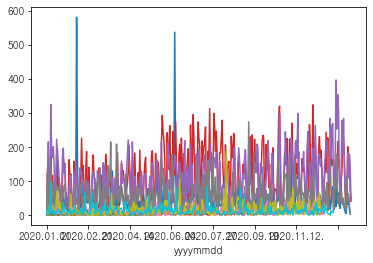

In [96]:
df_makguli_groupby2.plot()
df_rum_groupby2.plot()
df_gorangju_groupby2.plot()
df_bear_groupby2.plot()
df_wine_groupby2.plot()
df_boadca_groupby2.plot()
df_whiskey_groupby2.plot()
df_soju_groupby2.plot()
df_juntongju_groupby2.plot()
df_localsoju_groupby2.plot()

In [97]:
## 갯수를 내림차수로 정렬한다 이유!! 뉴스사를 뽑기위해? 대표 뉴스사를 추려서 
# df_groupby.sort_values(by='yyyymm', ascending=False)[:20]

In [98]:
# 저장
# df.to_csv('네이버뉴스결과피터링.csv', index=False)